<a href="https://colab.research.google.com/github/pucuk-yusup/Portofolio-Analisis/blob/main/Fuzzy_Cmeans_Sektor_Energi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install pandas numpy scikit-learn scikit-fuzzy matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.9 MB/s eta 0:00:00


In [15]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [16]:
# 1. Simulasi data: 3 segmen industri dengan profil energi berbeda
X, _ = make_blobs(n_samples=300, centers=3, n_features=5, random_state=42)
X = StandardScaler().fit_transform(X)  # Normalisasi

In [17]:
# 2. Transpose untuk FCM
X_T = X.T

In [18]:
# 3. Fuzzy C-Means
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    X_T, c=3, m=2, error=0.005, maxiter=1000, init=None
)
cluster_labels = np.argmax(u, axis=0)

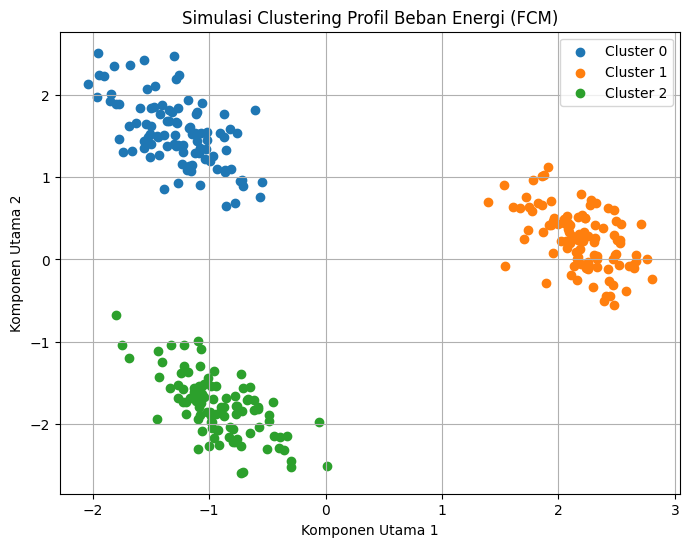

In [19]:
# 4. Visualisasi (pakai PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1], label=f'Cluster {i}')
plt.title('Simulasi Clustering Profil Beban Energi (FCM)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend()
plt.grid()
plt.show()

Kelanjutannya

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import skfuzzy as fuzz
import seaborn as sns
import pandas as pd

In [21]:
# 1. Simulasi data: 3 segmen industri dengan profil energi berbeda
X, y_true = make_blobs(n_samples=600, centers=3, n_features=6, cluster_std=1.2, random_state=42)
feature_names = [f'Load_Hour_{i}' for i in range(1, 7)]
df = pd.DataFrame(X, columns=feature_names)
df['true_cluster'] = y_true

In [22]:
# 2. Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_names])

In [23]:
# 3. Transpose untuk FCM
X_T = X_scaled.T

In [24]:
# 4. Terapkan Fuzzy C-Means
n_clusters = 3
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    X_T, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None
)
fcm_labels = np.argmax(u, axis=0)
df['fcm_cluster'] = fcm_labels


In [25]:
# 5. Reduksi Dimensi (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

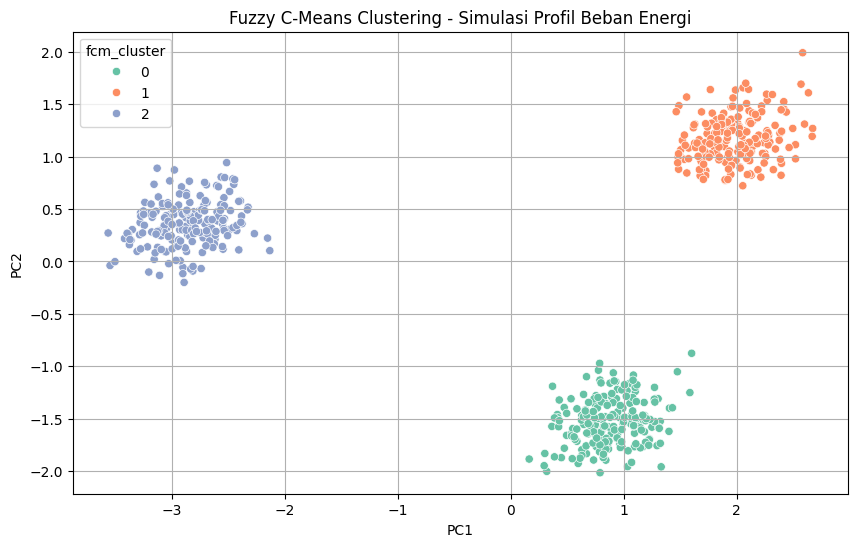

In [26]:
# 6. Visualisasi Hasil Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='fcm_cluster', palette='Set2')
plt.title('Fuzzy C-Means Clustering - Simulasi Profil Beban Energi')
plt.grid(True)
plt.show()

In [28]:
# 7. Analisis Profil per Cluster
cluster_profiles = df.groupby('fcm_cluster')[feature_names].mean().T
# Tampilkan dalam bentuk tabel
print("Profil Rata-rata Konsumsi Energi per Cluster:")
display(cluster_profiles.style.background_gradient(cmap='YlGnBu').format(precision=2))

Profil Rata-rata Konsumsi Energi per Cluster:


fcm_cluster,0,1,2
Load_Hour_1,-2.50,-8.91,6.70
Load_Hour_2,9.00,7.46,-5.95
Load_Hour_3,4.62,1.97,-6.39
Load_Hour_4,2.15,4.24,-6.14
Load_Hour_5,-6.72,-9.54,-3.87
Load_Hour_6,-6.93,9.46,0.54


In [29]:
# 8. Skor Silhouette untuk Evaluasi
sil_score = silhouette_score(X_scaled, fcm_labels)
sil_score

np.float64(0.7416912510454599)

Membership degree (fuzzy u)

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# Ambil nilai keanggotaan fuzzy dari matriks 'u'
membership_df = pd.DataFrame(u.T, columns=[f'Membership_Cluster_{i}' for i in range(n_clusters)])

In [32]:
# Gabungkan dengan hasil PCA untuk visualisasi terarah (jika ingin scatter)
membership_df[['PC1', 'PC2']] = X_pca

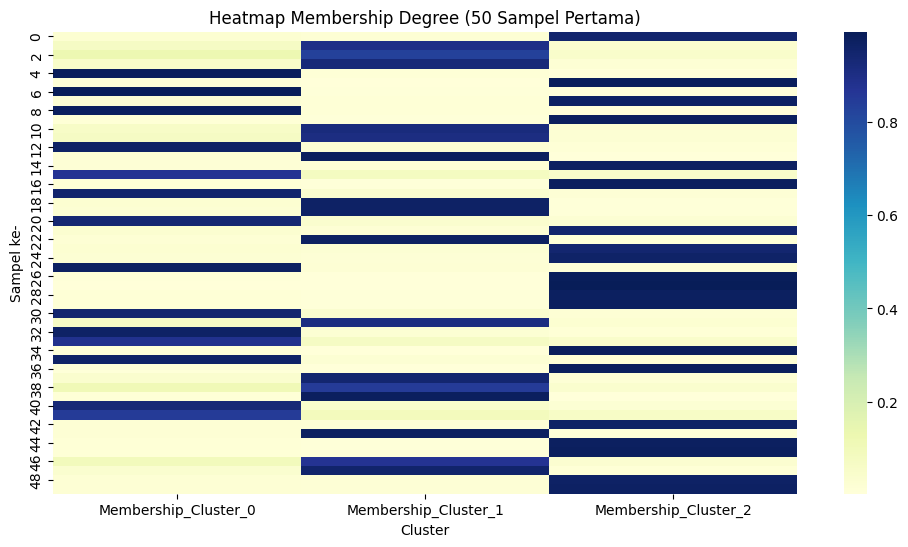

In [33]:
# Heatmap untuk 50 sampel pertama (biar tidak terlalu penuh)
plt.figure(figsize=(12, 6))
sns.heatmap(membership_df.iloc[:50, :n_clusters], cmap="YlGnBu", annot=False)
plt.title("Heatmap Membership Degree (50 Sampel Pertama)")
plt.xlabel("Cluster")
plt.ylabel("Sampel ke-")
plt.show()

In [34]:
# Spider plot untuk rata-rata membership tiap cluster
avg_membership = membership_df.iloc[:, :n_clusters].mean()

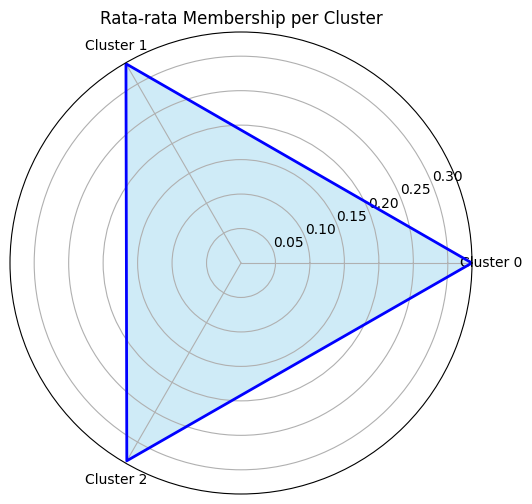

In [36]:
# Setup spider plot
labels = [f'Cluster {i}' for i in range(n_clusters)]
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
avg_values = avg_membership.tolist()
avg_values += avg_values[:1]  # Loop back to the start

angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, avg_values, color='blue', linewidth=2)
ax.fill(angles, avg_values, color='skyblue', alpha=0.4)
ax.set_title('Rata-rata Membership per Cluster')
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.show()

Buat Visualisasi

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

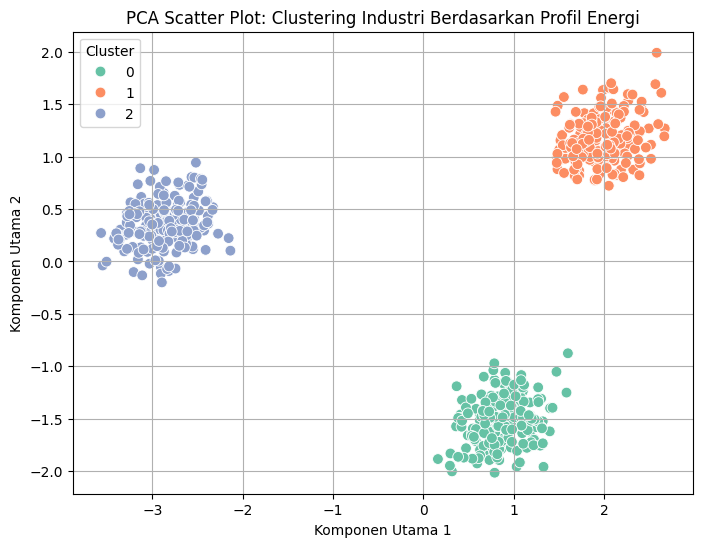

In [38]:
# 1. PCA Scatter Plot by Cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='fcm_cluster', palette='Set2', s=60)
plt.title('PCA Scatter Plot: Clustering Industri Berdasarkan Profil Energi')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

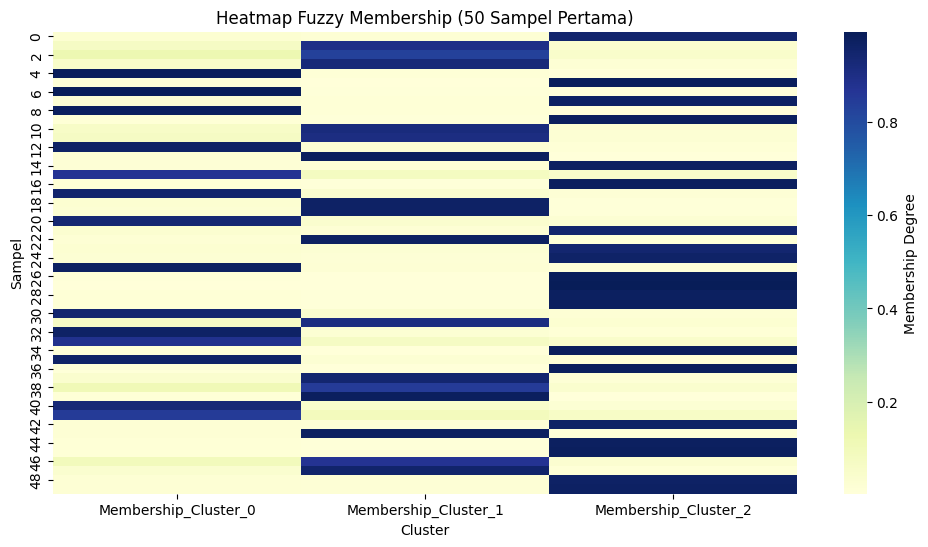

In [39]:
# 2. Heatmap Membership Degree (first 50 samples)
plt.figure(figsize=(12, 6))
sns.heatmap(membership_df.iloc[:50, :n_clusters], cmap="YlGnBu", cbar_kws={'label': 'Membership Degree'})
plt.title("Heatmap Fuzzy Membership (50 Sampel Pertama)")
plt.xlabel("Cluster")
plt.ylabel("Sampel")
plt.show()

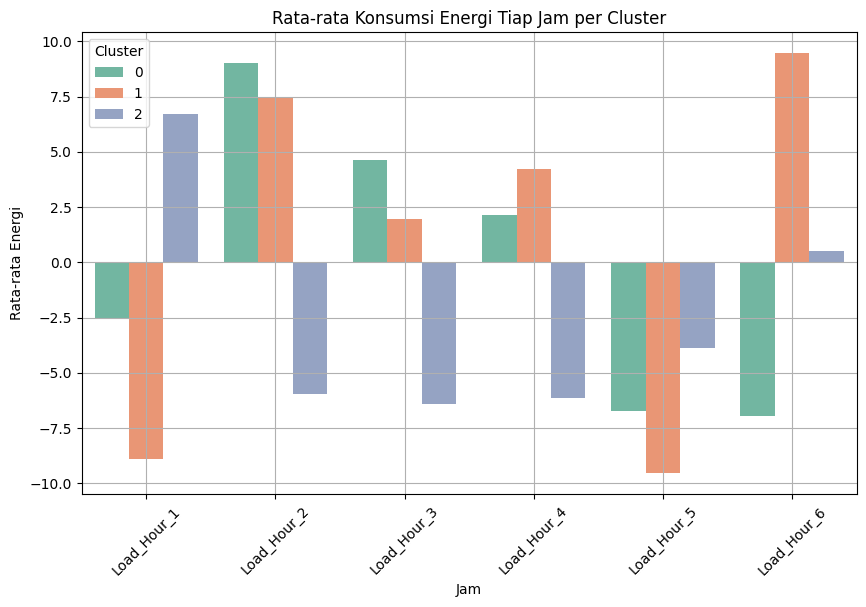

In [40]:
# 3. Profil Rata-rata Konsumsi Energi (Barplot)
cluster_profiles_reset = cluster_profiles.reset_index().melt(id_vars='index', var_name='Cluster', value_name='Rata-rata Energi')
cluster_profiles_reset.rename(columns={'index': 'Jam'}, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_profiles_reset, x='Jam', y='Rata-rata Energi', hue='Cluster', palette='Set2')
plt.title('Rata-rata Konsumsi Energi Tiap Jam per Cluster')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

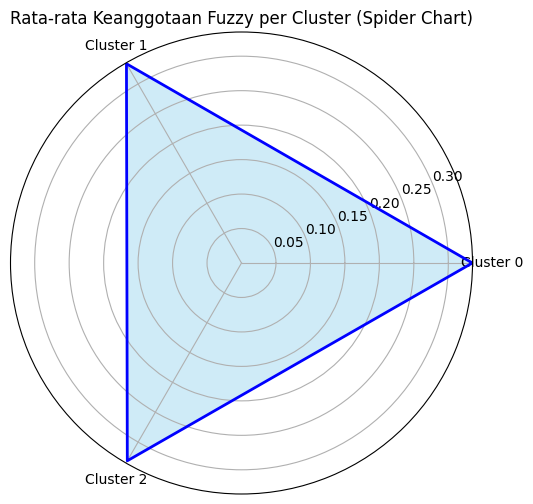

In [41]:
# 4. Spider Plot - Rata-rata Membership per Cluster
labels = [f'Cluster {i}' for i in range(n_clusters)]
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
avg_values = avg_membership.tolist()
avg_values += avg_values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, avg_values, color='blue', linewidth=2)
ax.fill(angles, avg_values, color='skyblue', alpha=0.4)
ax.set_title('Rata-rata Keanggotaan Fuzzy per Cluster (Spider Chart)')
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.show()

GIF Visualisasi

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

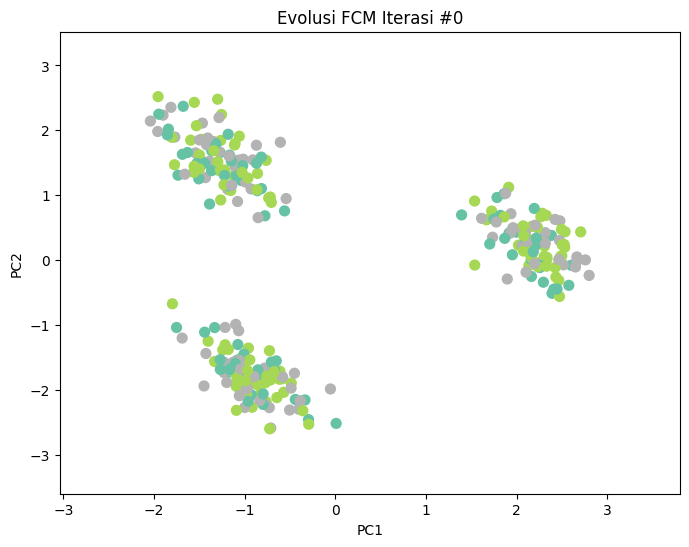

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.animation import FuncAnimation

# 1. Simulasi data
X, _ = make_blobs(n_samples=300, centers=3, n_features=5, random_state=42)
X_scaled = StandardScaler().fit_transform(X)
X_T = X_scaled.T

# 2. Siapkan struktur kosong untuk menyimpan hasil iterasi
history = []

# 3. Custom FCM manual dengan logging tiap iterasi
def fuzzy_cmeans_with_history(X_T, c=3, m=2, error=0.005, maxiter=30):
    n_features, n_samples = X_T.shape
    u = np.random.dirichlet(np.ones(c), size=n_samples).T
    history.append(np.argmax(u, axis=0))

    for i in range(maxiter):
        u_m = u ** m
        centers = (u_m @ X_T.T) / np.sum(u_m, axis=1, keepdims=True)
        dist = np.zeros((c, n_samples))

        for j in range(c):
            dist[j] = np.linalg.norm(X_T.T - centers[j], axis=1)

        dist = np.fmax(dist, np.finfo(np.float64).eps)
        tmp = dist ** (2 / (m - 1))
        u_new = 1.0 / tmp / np.sum(1.0 / tmp, axis=0)
        history.append(np.argmax(u_new, axis=0))

        if np.linalg.norm(u_new - u) < error:
            break
        u = u_new

    return centers, u

centers, u_final = fuzzy_cmeans_with_history(X_T)

# 4. PCA untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. Siapkan plot animasi
fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter([], [], c=[], cmap='Set2', s=50)
ax.set_xlim(X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1)
ax.set_ylim(X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1)
ax.set_title('Evolusi Clustering FCM (Soft → Konvergen)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# 6. Fungsi update frame animasi
def update(frame):
    labels = history[frame]
    sc.set_offsets(X_pca)
    sc.set_array(labels)
    ax.set_title(f'Evolusi FCM Iterasi #{frame}')
    return sc,

# 7. Buat animasi
ani = FuncAnimation(fig, update, frames=len(history), interval=500, blit=False)

# Simpan sebagai GIF ke direktori lokal
gif_path = "fcm_clustering_evolution.gif"
ani.save(gif_path, writer='pillow', fps=2)

# Unduh ke lokal
from google.colab import files
files.download(gif_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

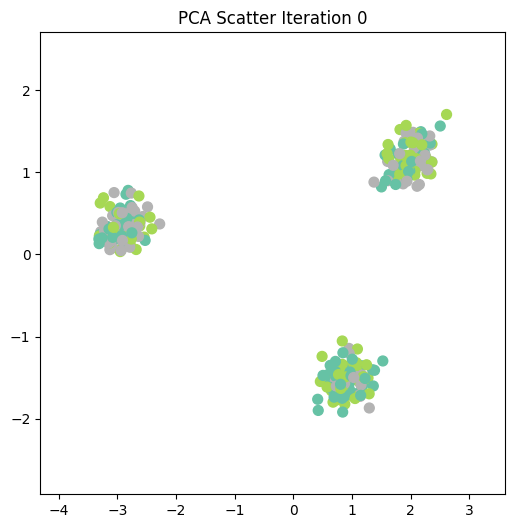

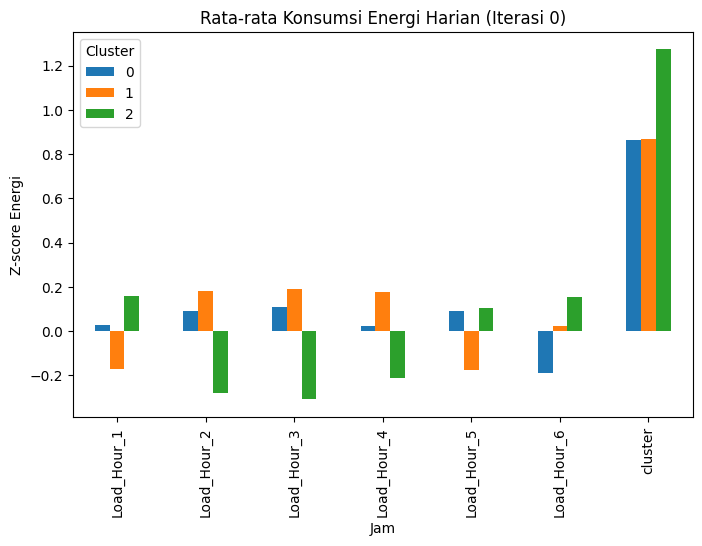

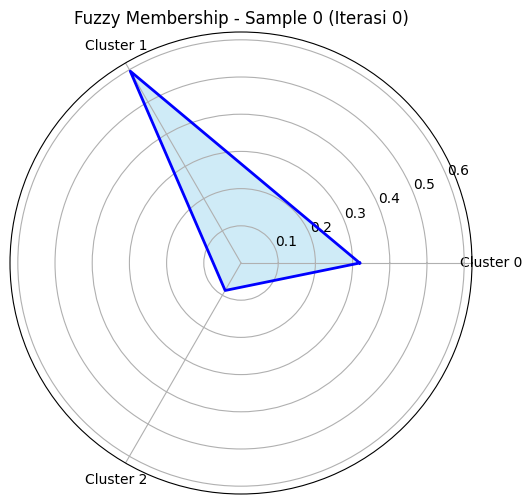

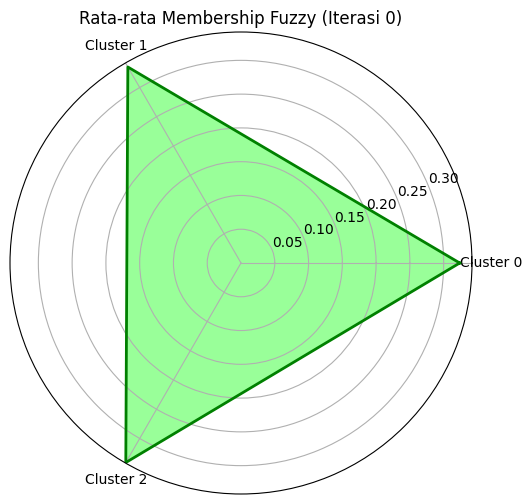

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Setup data
X, _ = make_blobs(n_samples=300, centers=3, n_features=6, random_state=42)
X_scaled = StandardScaler().fit_transform(X)
X_T = X_scaled.T
n_clusters = 3
max_iter = 20
m = 2

# Manual FCM with history
def fuzzy_cmeans_with_membership(X_T, c=3, m=2, maxiter=20, error=0.005):
    n_features, n_samples = X_T.shape
    u = np.random.dirichlet(np.ones(c), size=n_samples).T
    u_hist, label_hist, center_hist = [u.copy()], [np.argmax(u, axis=0)], []

    for _ in range(max_iter):
        u_m = u ** m
        centers = (u_m @ X_T.T) / np.sum(u_m, axis=1, keepdims=True)
        center_hist.append(centers.copy())

        dist = np.array([np.linalg.norm(X_T.T - centers[i], axis=1) for i in range(c)])
        dist = np.fmax(dist, np.finfo(np.float64).eps)
        tmp = dist ** (2 / (m - 1))
        u_new = 1.0 / tmp / np.sum(1.0 / tmp, axis=0)

        if np.linalg.norm(u_new - u) < error:
            break

        u = u_new
        u_hist.append(u.copy())
        label_hist.append(np.argmax(u, axis=0))

    return u_hist, label_hist, center_hist

u_hist, label_hist, center_hist = fuzzy_cmeans_with_membership(X_T)

# Prepare PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# GIF 1: PCA Scatter Moving
fig1, ax1 = plt.subplots(figsize=(6, 6))
sc = ax1.scatter([], [], c=[], cmap='Set2', s=50)
ax1.set_xlim(X_pca[:, 0].min()-1, X_pca[:, 0].max()+1)
ax1.set_ylim(X_pca[:, 1].min()-1, X_pca[:, 1].max()+1)
ax1.set_title("PCA Scatter Cluster Evolution")

def update_scatter(i):
    sc.set_offsets(X_pca)
    sc.set_array(label_hist[i])
    ax1.set_title(f"PCA Scatter Iteration {i}")
    return sc,

ani1 = FuncAnimation(fig1, update_scatter, frames=len(label_hist), interval=500)
ani1.save("pca_scatter_evolution.gif", writer=PillowWriter(fps=2))

from google.colab import files
files.download("pca_scatter_evolution.gif")

# GIF 2: Energi Harian per Cluster
df = pd.DataFrame(X_scaled, columns=[f'Load_Hour_{i+1}' for i in range(6)])
df['cluster'] = label_hist[-1]
fig2, ax2 = plt.subplots(figsize=(8, 5))

def update_bar(i):
    ax2.clear()
    u_now = u_hist[i]
    df['soft_cluster'] = np.argmax(u_now, axis=0)
    profile = df.groupby('soft_cluster').mean().T
    profile.plot(kind='bar', ax=ax2)
    ax2.set_title(f'Rata-rata Konsumsi Energi Harian (Iterasi {i})')
    ax2.set_ylabel('Z-score Energi')
    ax2.legend(title='Cluster')
    ax2.set_xlabel('Jam')

ani2 = FuncAnimation(fig2, update_bar, frames=len(u_hist), interval=600)
ani2.save("daily_energy_profile.gif", writer=PillowWriter(fps=2))
files.download("daily_energy_profile.gif")

# GIF 3: Spider Chart Membership of Sample #0
fig3, ax3 = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
angles = np.linspace(0, 2 * np.pi, n_clusters, endpoint=False).tolist()
angles += angles[:1]

def update_spider(i):
    ax3.clear()
    values = u_hist[i][:, 0].tolist() + [u_hist[i][0, 0]]
    ax3.plot(angles, values, color='blue', linewidth=2)
    ax3.fill(angles, values, color='skyblue', alpha=0.4)
    ax3.set_title(f"Fuzzy Membership - Sample 0 (Iterasi {i})")
    ax3.set_xticks(angles[:-1])
    ax3.set_xticklabels([f'Cluster {j}' for j in range(n_clusters)])

ani3 = FuncAnimation(fig3, update_spider, frames=len(u_hist), interval=600)
ani3.save("membership_spider_sample0.gif", writer=PillowWriter(fps=2))

files.download("membership_spider_sample0.gif")


# GIF 4: Spider Chart Growing (Avg Membership)
fig4, ax4 = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

def update_avg_spider(i):
    ax4.clear()
    avg_u = np.mean(u_hist[i], axis=1).tolist() + [np.mean(u_hist[i], axis=1)[0]]
    ax4.plot(angles, avg_u, color='green', linewidth=2)
    ax4.fill(angles, avg_u, color='lime', alpha=0.4)
    ax4.set_title(f"Rata-rata Membership Fuzzy (Iterasi {i})")
    ax4.set_xticks(angles[:-1])
    ax4.set_xticklabels([f'Cluster {j}' for j in range(n_clusters)])

ani4 = FuncAnimation(fig4, update_avg_spider, frames=len(u_hist), interval=600)
ani4.save("avg_membership_spider.gif", writer=PillowWriter(fps=2))

files.download("avg_membership_spider.gif")
